In [974]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
import matplotlib.cm as cm
from sklearn.datasets import make_gaussian_quantiles

In [964]:
X1, y1 = make_gaussian_quantiles(cov=2.,
                                 n_samples=200, n_features=2,
                                 n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                 n_samples=300, n_features=2,
                                 n_classes=2, random_state=1)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))

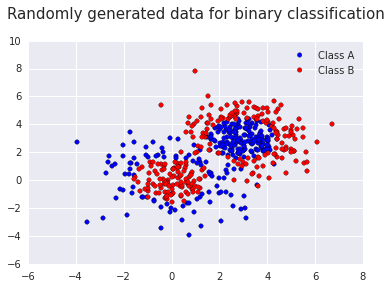

In [1025]:
np.random.seed(111)
#X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,n_samples=500)
plot_colors = "br"
plot_step = 0.02
class_names = "AB"
new_labels=np.ones(len(y))
for i in range(len(y)):
    if y[i]==0:
        new_labels[i]=-1
    else:
        new_labels[i]=1

for i, n, c in zip([1,-1], class_names, plot_colors):
    idx = np.where(new_labels == i)
    plt.scatter(X[idx, 0], X[idx, 1],
                c=c, cmap=plt.cm.Paired,
                label="Class %s" % n)
plt.legend()
plt.title("Randomly generated data for binary classification\n",size=15)
plt.show()

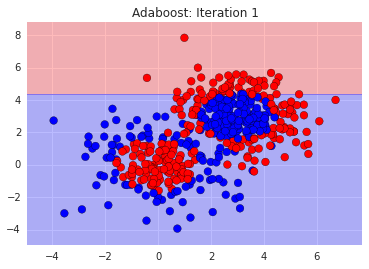

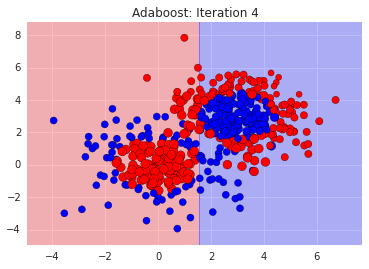

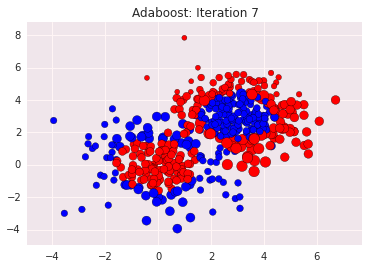

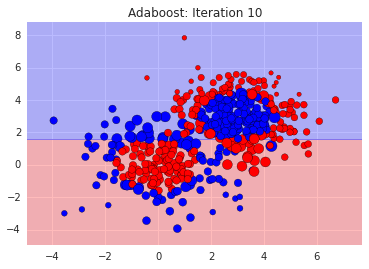

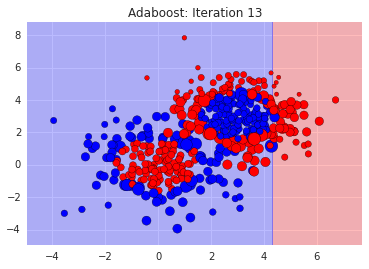

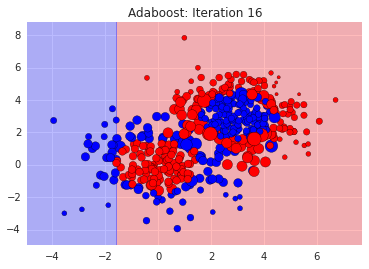

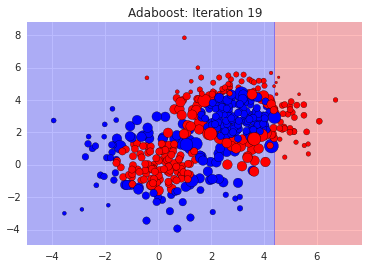

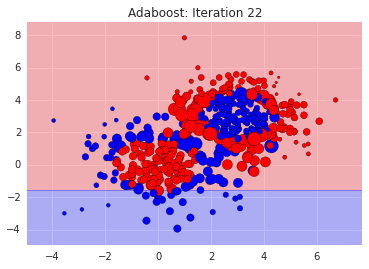

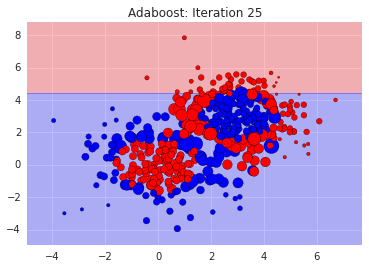

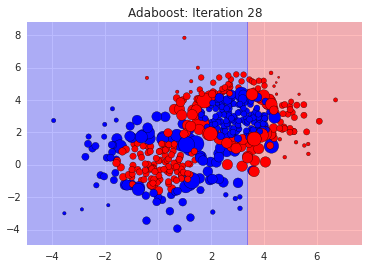

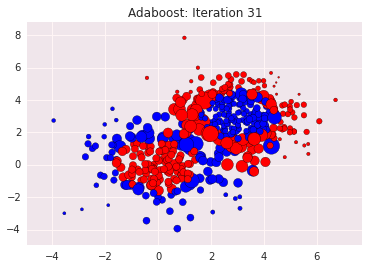

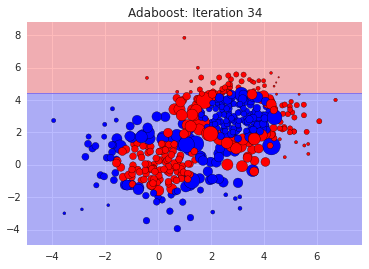

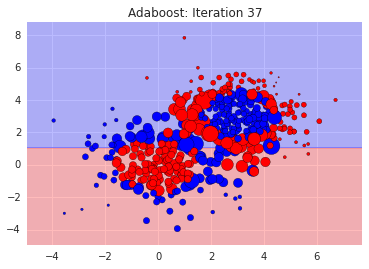

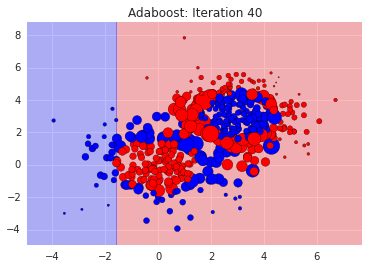

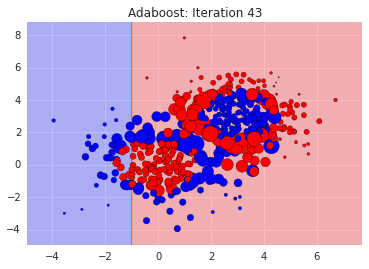

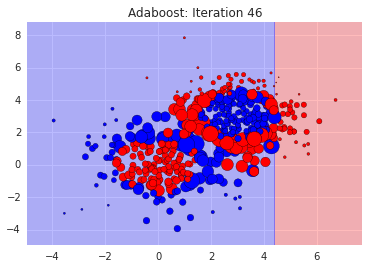

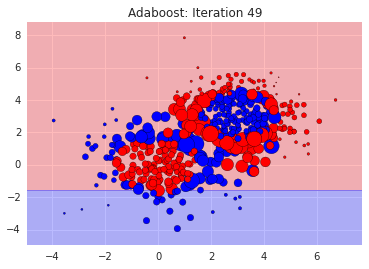

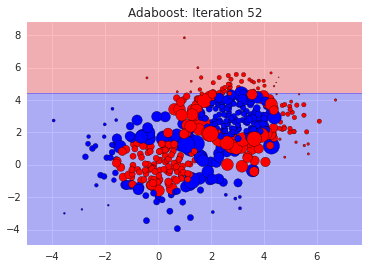

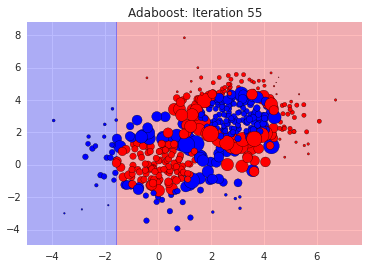

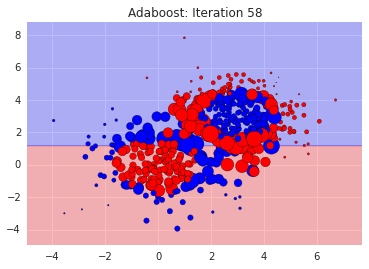

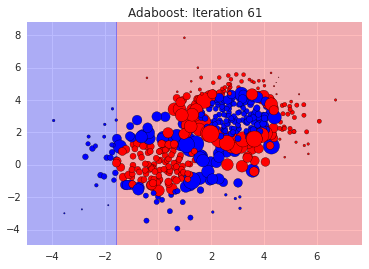

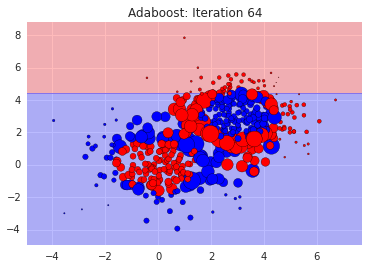

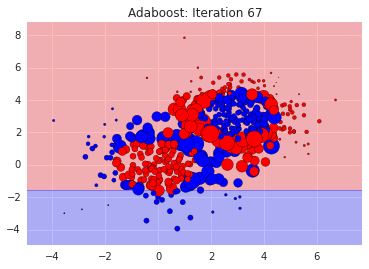

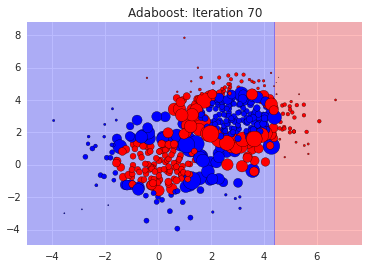

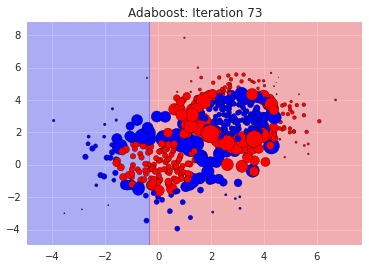

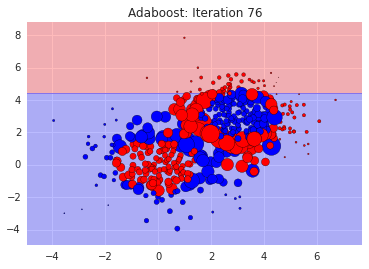

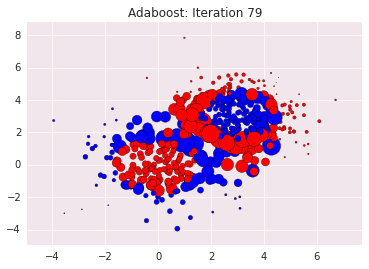

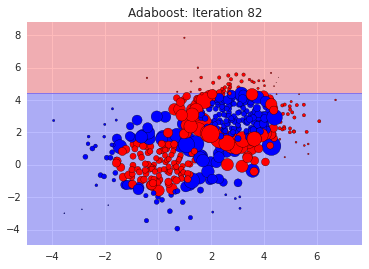

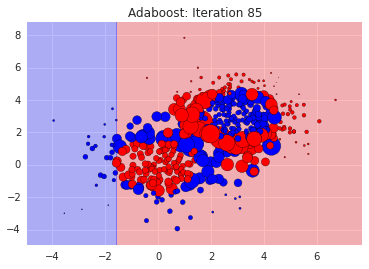

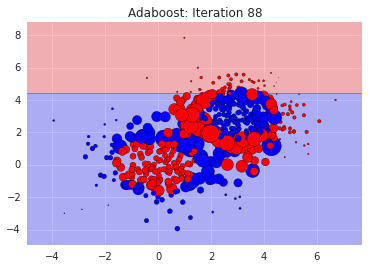

In [1045]:
hypotheses = []
hypothesis_weights = []
N = len(X)
d = np.ones(N) / N

x_min, x_max = X[:, 0].min()-1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000),
                     np.linspace(y_min, y_max, 1000))

for i in range(10):
    clf = DecisionTreeClassifier(max_depth=1).fit(X, new_labels, sample_weight=d)
    pred = clf.predict(X)
    
    if i%3==0:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, cmap=("bwr_r"),c=new_labels,alpha=0.3)
        plt.axis("tight")
        sca = plt.scatter(X[:, 0], X[:, 1], marker='o', c=new_labels, cmap=("bwr_r"))
        sca._sizes = d*30000
        plt.title("Adaboost: Iteration {}".format(i+1))
        plt.show()

    eps = d.dot(pred != new_labels)
    alpha = (np.log(1 - eps) - np.log(eps)) / 2
    d = d * np.exp(- alpha * new_labels * pred)
    d = d / d.sum()
    
    hypotheses.append(clf)
    hypothesis_weights.append(alpha)
    

In [944]:
y = np.zeros(N)
for (clf, alpha) in zip(hypotheses, hypothesis_weights):
    y = y + alpha * clf.predict(X)
y = np.sign(y)
sum(new_labels!=y)

65

In [949]:
cla = np.linspace(1,201,41)
misclass=[]

for i in cla:
    ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),
                         algorithm="SAMME",
                         n_estimators=int(i))
    ada.fit(X,new_labels)
    misclass.append(sum(ada.predict(X)!=new_labels))
    

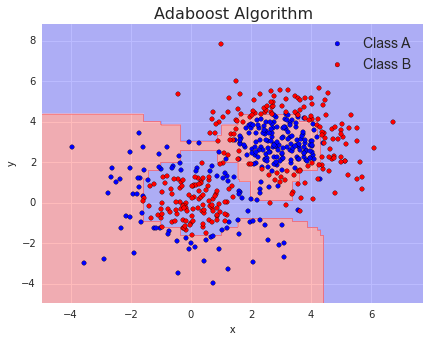

In [1040]:
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=200)
ada.fit(X,new_labels)

plot_colors = "br"
plot_step = 0.02
class_names = "AB"

plt.figure(figsize=(15, 5))

# Plot the decision boundaries
plt.subplot(121)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = ada.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=('bwr'),alpha=0.3)
plt.axis("tight")

# Plot the training points
for i, n, c in zip([1,-1], class_names, plot_colors):
    idx = np.where(new_labels == i)
    plt.scatter(X[idx, 0], X[idx, 1],
                c=c, cmap=('bwr'),
                label="Class %s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right',fontsize=14)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Adaboost Algorithm',size=16)
plt.show()

In [952]:
import seaborn as sns

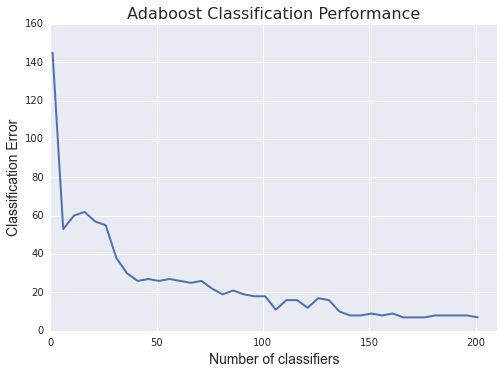

In [955]:
plt.plot(cla,misclass,linewidth=2)
plt.title("Adaboost Classification Performance",size=16)
plt.xlabel("Number of classifiers",size=14)
plt.ylabel("Classification Error",size=14)
plt.xlim(0,210)
plt.show()